# Pregunta 2

## Partes a) y b)

In [20]:
# importar datos
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from IPython.display import display
data = fetch_california_housing()
print('Llaves del diccionario:\t', data.keys() ) #1era es input y 2da es output
print('Nombres de atributos:\t', data.feature_names ) # variables de entrada


# importar modelos
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

Llaves del diccionario:	 dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
Nombres de atributos:	 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Veamos de qué se trata la data:

In [21]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

Ordenemos un poco los datos para manejarlos con facilidad:

In [22]:
# base de atributos
X  = pd.DataFrame(data.data, columns=data.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [23]:
X.shape 

(20640, 8)

In [24]:
data.target_names[0]

'MedHouseVal'

In [25]:
y = pd.Series(data.target, name=data.target_names[0]) 
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

### Regresiones

In [26]:
coefs = []
# intercepts = []
for model in [LinearRegression(), Lasso(), Ridge()]:
    # Fit
    model.fit(X,y)
    print('-'*50)

    # R^2
    R2 = round(model.score(X,y),3)
    print(f'R^2 para {model}: \t{R2}')
    
    # RMSE
    y_pred = model.predict(X)
    RMSE = round(np.sqrt(mean_squared_error(y, y_pred)), 3)
    print(f'RMSE para {model}: \t{RMSE}')

    # # Coeficientes
    coef = pd.DataFrame(model.coef_.reshape(-1,len(data.feature_names)), index=[f'{model}'[:-2]], columns=data.feature_names, )
    coef['Intercept'] = model.intercept_
    coefs.append(coef)

# Todos los coeficientes
coefs = pd.concat(coefs)
np.transpose(round(coefs,3))#.to_latex()

--------------------------------------------------
R^2 para LinearRegression(): 	0.606
RMSE para LinearRegression(): 	0.724
--------------------------------------------------
R^2 para Lasso(): 	0.285
RMSE para Lasso(): 	0.976
--------------------------------------------------
R^2 para Ridge(): 	0.606
RMSE para Ridge(): 	0.724


,LinearRegression,Lasso,Ridge
MedInc,0.437,0.145,0.437
HouseAge,0.009,0.006,0.009
AveRooms,-0.107,0.000,-0.107
AveBedrms,0.645,-0.000,0.644
Population,-0.000,-0.000,-0.000
AveOccup,-0.004,-0.000,-0.004
Latitude,-0.421,-0.000,-0.421
Longitude,-0.435,-0.000,-0.434
Intercept,-36.942,1.348,-36.939


Plot de parámetros

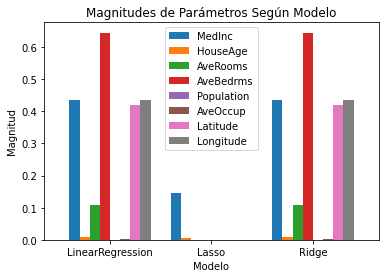

In [27]:
import matplotlib.pyplot as plt
plot = abs(coefs.drop(columns=['Intercept'])).plot.bar(rot=0, width=0.8)
plt.title('Magnitudes de Parámetros Según Modelo')
plt.ylabel('Magnitud')
plt.xlabel('Modelo')
plt.savefig("barplot_train_p2.pdf")

## Parte c)

In [28]:
from sklearn.model_selection import train_test_split

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

display(X_train.head())
X_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
9950,4.5694,28.0,6.219512,1.030488,504.0,3.073171,38.38,-122.33
3547,5.6392,18.0,5.951644,1.034816,3010.0,2.911025,34.26,-118.60
4448,1.7292,47.0,3.628032,1.032345,1452.0,3.913747,34.07,-118.21
6984,4.6226,36.0,5.126238,0.985149,988.0,2.445545,33.96,-118.02
4432,2.4375,49.0,4.024390,0.942073,1405.0,4.283537,34.08,-118.20


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
19121,3.7917,40.0,4.959799,1.030151,1039.0,2.610553,38.24,-122.64
20019,4.0217,9.0,5.804577,1.000000,1749.0,3.079225,36.09,-119.05
15104,4.0882,12.0,5.360360,1.070571,3321.0,4.986486,32.85,-116.98
3720,2.2377,27.0,3.376582,1.023207,3403.0,3.589662,34.20,-118.42
8938,4.4211,41.0,5.656904,1.165272,1047.0,2.190377,34.01,-118.47


### Regresiones

In [33]:


def modelos_train_test(X_train, y_train,X_test, y_test):
    coefs2 = []
    for model in [LinearRegression(), Lasso(), Ridge()]:
        # Fit
        model.fit(X_train,y_train)
        print('-'*50)

        # R^2
        R2 = round(model.score(X_test,y_test),3)
        print(f'R^2 para {model}: \t{R2}')
        
        # RMSE
        y_pred = model.predict(X_test)
        RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)
        print(f'RMSE para {model}: \t{RMSE}')

        # # Coeficientes
        coef2 = pd.DataFrame(model.coef_.reshape(-1,len(data.feature_names)), index=[f'{model}'[:-2]], columns=data.feature_names, )
        coef2['Intercept'] = model.intercept_
        coefs2.append(coef2)

    # Todos los coeficientes
    coefs2 = pd.concat(coefs2)
    return round(coefs2,3)

# Output
print(np.transpose(modelos_train_test(X_train, y_train, X_test, y_test)).to_latex())

--------------------------------------------------
R^2 para LinearRegression(): 	0.61
RMSE para LinearRegression(): 	0.72
--------------------------------------------------
R^2 para Lasso(): 	0.286
RMSE para Lasso(): 	0.975
--------------------------------------------------
R^2 para Ridge(): 	0.61
RMSE para Ridge(): 	0.72
\begin{tabular}{lrrr}
\toprule
{} &  LinearRegression &  Lasso &   Ridge \\
\midrule
MedInc     &             0.440 &  0.146 &   0.440 \\
HouseAge   &             0.009 &  0.005 &   0.009 \\
AveRooms   &            -0.112 &  0.000 &  -0.112 \\
AveBedrms  &             0.648 & -0.000 &   0.647 \\
Population &            -0.000 & -0.000 &  -0.000 \\
AveOccup   &            -0.004 & -0.000 &  -0.004 \\
Latitude   &            -0.417 & -0.000 &  -0.417 \\
Longitude  &            -0.428 & -0.000 &  -0.428 \\
Intercept  &           -36.256 &  1.366 & -36.252 \\
\bottomrule
\end{tabular}



### Plot de parámetros

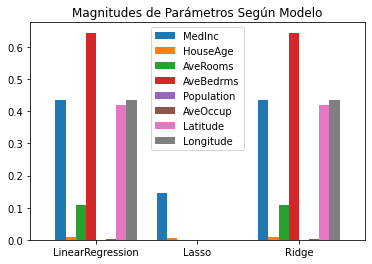

In [14]:
plot = abs(coefs.drop(columns=['Intercept'])).plot.bar(rot=0, width=0.8)
plt.title('Magnitudes de Parámetros Según Modelo')
plt.savefig("barplot_test_p2.pdf")
plt.show()


## Parte d) (BONUS)

Veamos si podemos limpiar la data para obtener mejores resultados

In [15]:
y.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

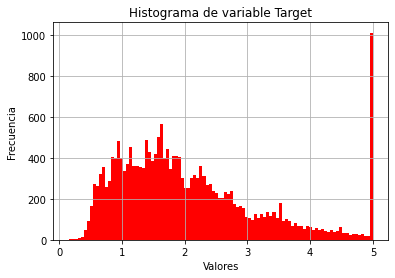

In [16]:
y.hist(bins=100, color='r')#, figsize=(8,6))
plt.title('Histograma de variable Target')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.savefig('outliers1.pdf')
plt.show()

Posiblemente la acumulación cercana al valor 5 sea producto de muchos outliers ó a la presencia de muchas casas con precios de venta excecivamente altos (como mansiones).

Veamos cómo se comportan los atributos:

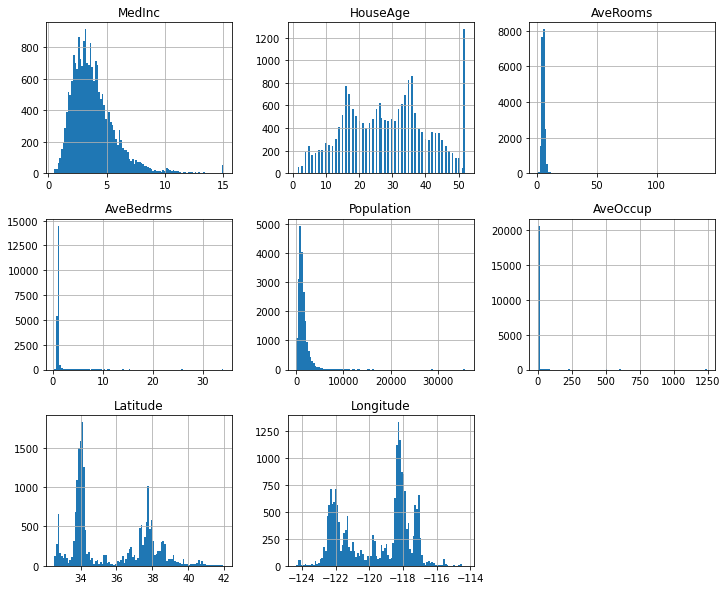

In [17]:
# plt.figure(figsize=(12,10))
X.hist(figsize=(12,10), bins=100)
plt.show()

Vemos que nuevamente tenemos resultados de frecuencia altísima en la antigüedad de la casa, lo que podría deberse a que desde cierta época hacia atrás se desconoce la verdadera fecha de contrucción o simplemente al hacer la base se puso un límite de antigüedad. Analizar estas casas tan antiguas podría no tener mucho sentido en principio, por lo que vamos a eliminar estos outliers:

In [18]:
X['HouseAge'].hist(bins=100, color='g')#, figsize=(6,4))
plt.title('Histograma de variable HouseAge')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.savefig('outliers2.pdf')
plt.show()

KeyboardInterrupt: 

Sacamos las casas con más de 51 años de ambas bases, agregando a la base la variable target:

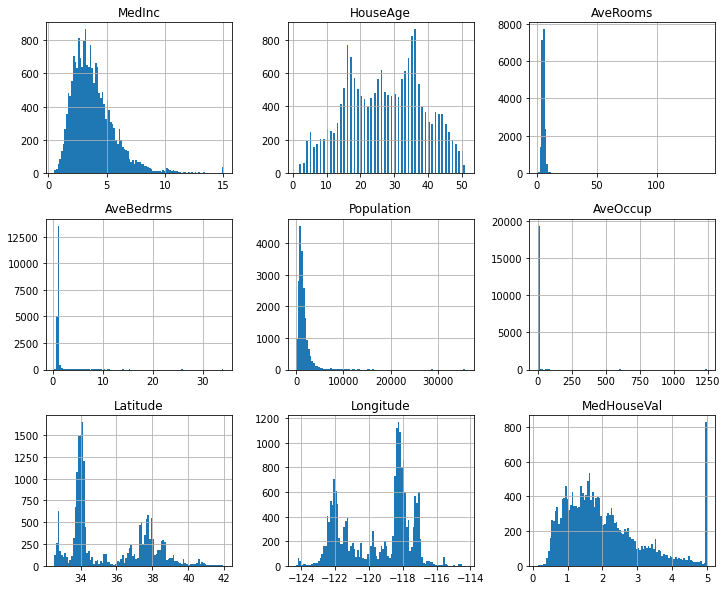

In [26]:
X['MedHouseVal'] = y 
X = X[X['HouseAge'] < 52]
X.hist(figsize=(12,10), bins=100)
plt.show()

Vemos que siguen habiendo muchos outliers en el precio de venta, lo que se puede deber también a un máximo establecido para el precio o un motivo similar. Veamos cómo se relaciona la variable de momento con el resto:

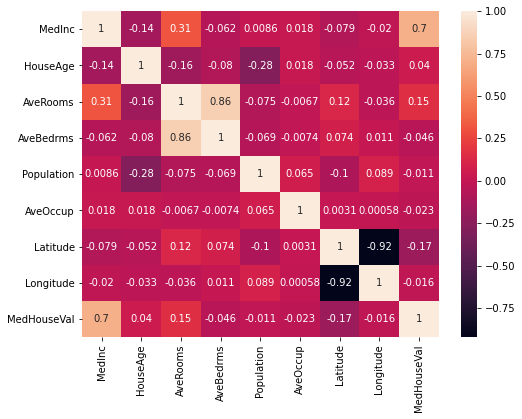

In [27]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), annot=True)
plt.show()

Vemos que en realidad la correlación no es muy alta. Para probar, vamos a sacar los outliers de la variable target y volver a repetir el mismo ejercicio:

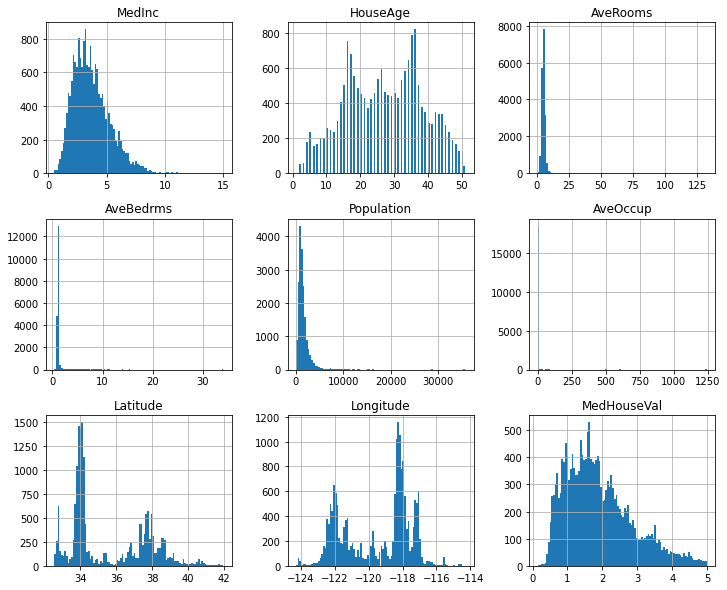

In [28]:
X = X[X['MedHouseVal'] < 5]
X.hist(figsize=(12,10), bins=100)
plt.show()

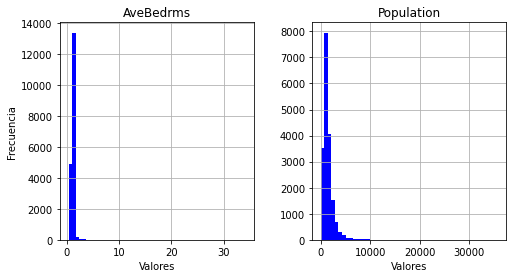

In [29]:

fig = X[['AveBedrms','Population']].hist(bins=50, color='b', figsize=(8,4))
fig[0,0].set_xlabel('Valores')
fig[0,0].set_ylabel('Frecuencia')
fig[0,1].set_xlabel('Valores')
plt.savefig('logaritmo1.pdf')
plt.show()

Notamos que también desaparecieron los preomedios de ocupación 0, que probablemente son casas que suelen tener otros fines distintos al habitable común.

Por último, transformamos las variables restantes a escala logaritmica para sacar de la izquierda a la mayoría:

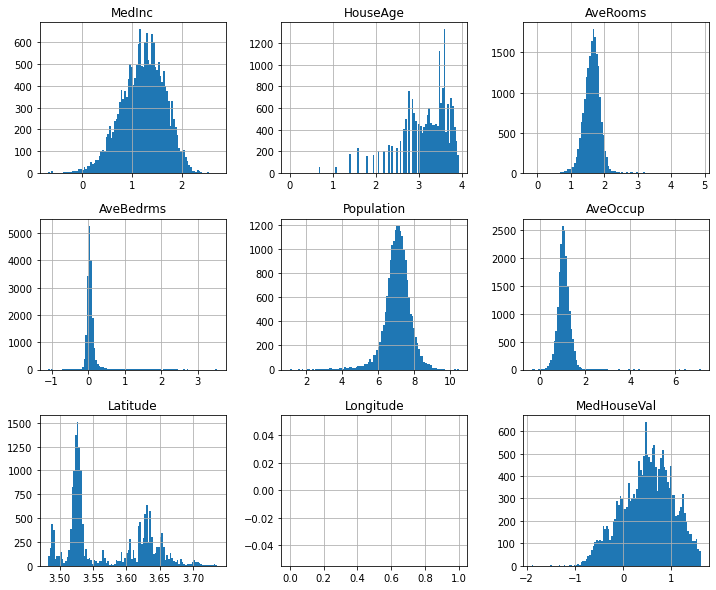

In [30]:
X = X[X['MedHouseVal'] < 5]
np.log(X).hist(figsize=(12,10), bins=100)
plt.show()

Nos quedamos con la escala logaritmica de todas excepto las de Latitude, Longitude y HouseAge, ya que estas no requería transformación. Vemos si mejora en algo la predición con estas transformaciones:

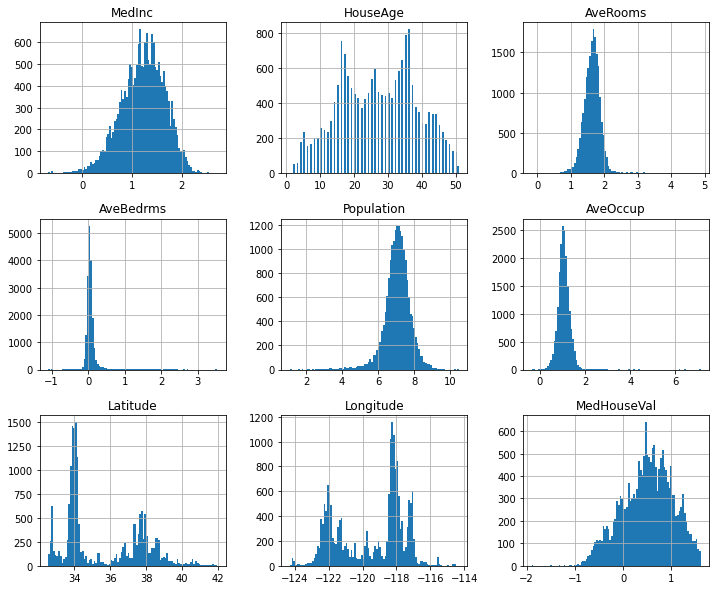

In [31]:
X_log = np.log(X)
X_log[['Latitude', 'Longitude', 'HouseAge']] = X[['Latitude', 'Longitude', 'HouseAge']] 
X_log.hist(figsize=(12,10), bins=100)
plt.show()

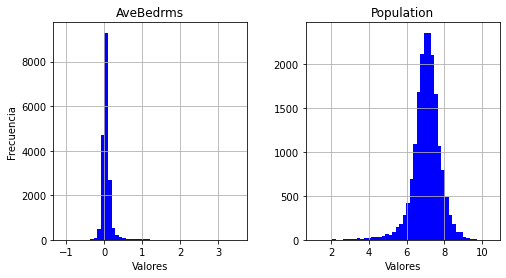

In [32]:
fig = X_log[['AveBedrms','Population']].hist(bins=50, color='b', figsize=(8,4))
fig[0,0].set_xlabel('Valores')
fig[0,0].set_ylabel('Frecuencia')
fig[0,1].set_xlabel('Valores')
plt.savefig('logaritmo2.pdf')
plt.show()

Conseguimos variables mucho mpas comparables en escala, por lo que aplicamos los modelos:


In [33]:
X2, y2 = X_log.drop(columns=['MedHouseVal']), X_log['MedHouseVal']

# split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

display(X_train.head())
X_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12215,1.522594,4.0,1.946832,0.133157,9.491828,1.116429,33.52,-117.12
9109,1.869723,2.0,2.086004,0.124991,8.318254,1.097880,34.60,-118.16
1524,1.958615,18.0,1.937176,0.052922,8.156510,0.926671,37.91,-122.09
3549,1.874046,18.0,1.903926,0.093090,6.507278,1.184268,34.22,-118.63
1019,1.580442,28.0,1.885717,0.032910,6.689599,1.094888,37.67,-121.78


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
16774,1.234744,26.0,1.363770,0.022473,8.107720,1.104655,37.69,-122.46
17788,1.442486,22.0,1.501413,-0.019575,8.162801,1.386294,37.36,-121.83
6273,1.399235,35.0,1.749745,0.040989,6.922644,1.446180,34.03,-117.94
3082,0.810930,15.0,1.810279,0.227495,6.593045,0.821603,35.68,-118.06
6456,1.181604,48.0,1.638217,0.103900,6.517671,0.904543,34.11,-118.05


Evaluamos en train y en test sólo para ver si tenemos overfitting u otros problemas:

In [34]:
# Modelos
modelos_train_test(X_train, y_train, X_train, y_train)

--------------------------------------------------
R^2 para LinearRegression(): 	0.65
RMSE para LinearRegression(): 	0.311
--------------------------------------------------
R^2 para Lasso(): 	0.0
RMSE para Lasso(): 	0.526
--------------------------------------------------
R^2 para Ridge(): 	0.65
RMSE para Ridge(): 	0.311


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Intercept
LinearRegression,0.798,0.002,-0.292,0.499,0.022,-0.36,-0.249,-0.243,-20.063
Lasso,0.000,0.000,0.000,-0.000,0.000,-0.00,-0.000,0.000,0.504
Ridge,0.796,0.002,-0.289,0.495,0.022,-0.36,-0.249,-0.244,-20.076


In [37]:
# Modelos
coefs = modelos_train_test(X_train, y_train, X_test, y_test)

--------------------------------------------------
R^2 para LinearRegression(): 	0.644
RMSE para LinearRegression(): 	0.317
--------------------------------------------------
R^2 para Lasso(): 	-0.001
RMSE para Lasso(): 	0.532
--------------------------------------------------
R^2 para Ridge(): 	0.644
RMSE para Ridge(): 	0.317


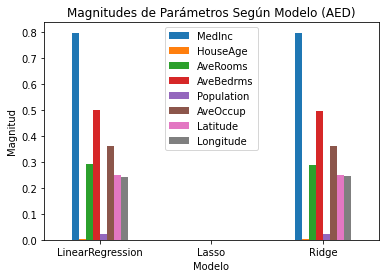

In [62]:
abs(coefs.drop(columns=['Intercept'])).plot.bar(rot=0)
plt.legend(loc=9)
plt.title('Magnitudes de Parámetros Según Modelo (AED)')
plt.xlabel('Modelo')
plt.ylabel('Magnitud')
plt.show()

In [35]:
print(np.transpose(round(coefs,3)).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  LinearRegression &  Lasso &   Ridge \\
\midrule
MedInc     &             0.437 &  0.145 &   0.437 \\
HouseAge   &             0.009 &  0.006 &   0.009 \\
AveRooms   &            -0.107 &  0.000 &  -0.107 \\
AveBedrms  &             0.645 & -0.000 &   0.644 \\
Population &            -0.000 & -0.000 &  -0.000 \\
AveOccup   &            -0.004 & -0.000 &  -0.004 \\
Latitude   &            -0.421 & -0.000 &  -0.421 \\
Longitude  &            -0.435 & -0.000 &  -0.434 \\
Intercept  &           -36.942 &  1.348 & -36.939 \\
\bottomrule
\end{tabular}

